# Second Section: Stanford Dogs Dataset

After having reached only modest results in the first section, we have decided to try our models on a more self consistent dataset, which is the **Stanford Dogs Dataset**.

This dataset contains thousands of images of dogs, and is divided into different classes (based on the type of dog). 

To start, we will restrict our attention to only one class of dogs. Unfortunately, unlike the previous dataset, this one only has 150 images per type of dog, therefore we will perform our first training with only 150 images (split between training and validation), and later we will perform some data augmentation to get some extra images.

### Image Description

In [41]:
import sys
sys.path.append('../Functions')  
sys.path.append('../Models')

from VisualizationFunctions import display_images, visualize_predictions, plot_predicted_image
from LoadingFunctions import load_images_from_directory, data_generator
from BatchNormModel import BatchNormModel
from ProcessingFunctions import preprocess_images
from TrainingFunctions import all_in_one
from keras.preprocessing.image import ImageDataGenerator
from AugmentationFunctions import visualize_augmentation, augment_directory
from PIL import Image


In [2]:
training_directory = '/Users/alessandroardenghi/ImageColorizationProjectData/StanfordDogs/_training_golden'
validation_directory = '/Users/alessandroardenghi/ImageColorizationProjectData/StanfordDogs/_validation_golden'

height = 200
width = 200

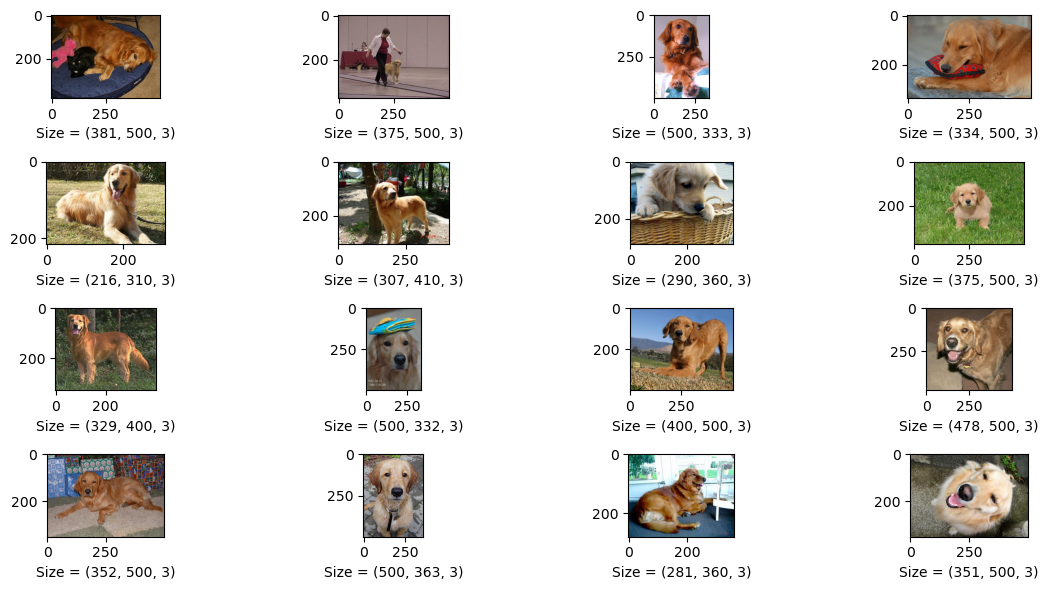

In [5]:
display_images(training_directory)

This dataset is made of RGB pictures of Golden Retrievers. The pictures come in many different shapes and will therefore need preprocessing.

In [6]:
train_images = load_images_from_directory(training_directory, n = 120)
val_images = load_images_from_directory(validation_directory, n = 30)

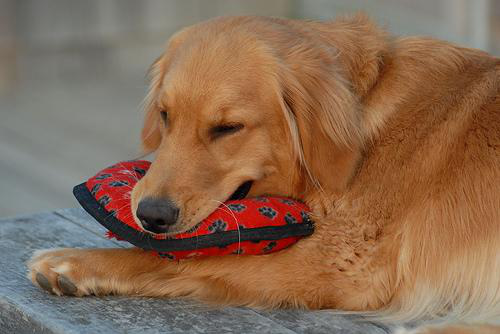

In [7]:
train_images[0]

### Model Training

The model that we decided to use in this section is the one which performed best in the previous one, namely the Batch_Norm_Model. 

We must remark that, contrary to before, we will change the parameters between the different models in order to optimize the preictions of the model.

In [12]:
img_shapes, X_val, Y_val = preprocess_images(val_images, height, width)
batch_size = 8
train_dataloader = data_generator(training_directory, batch_size, height, width)
Batch_Dogs_Model = BatchNormModel(height, width)

Epoch 79: early stopping
1/1 [==============================] - 0s 95ms/step


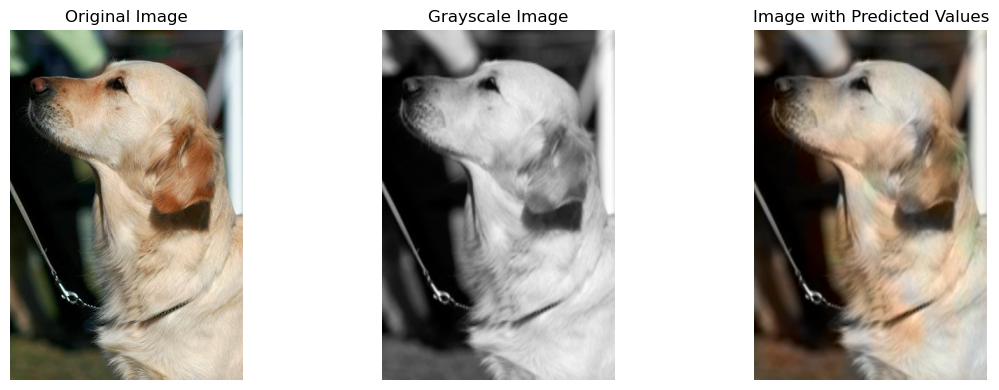

1/1 [==============================] - 0s 17ms/step


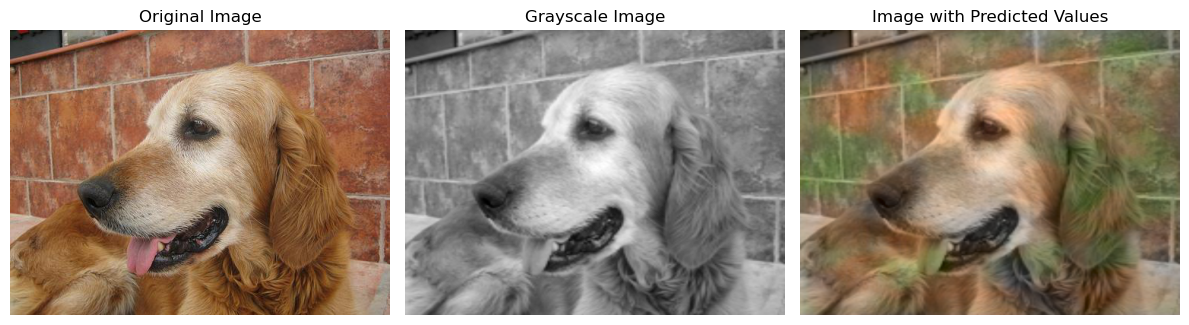

1/1 [==============================] - 0s 44ms/step


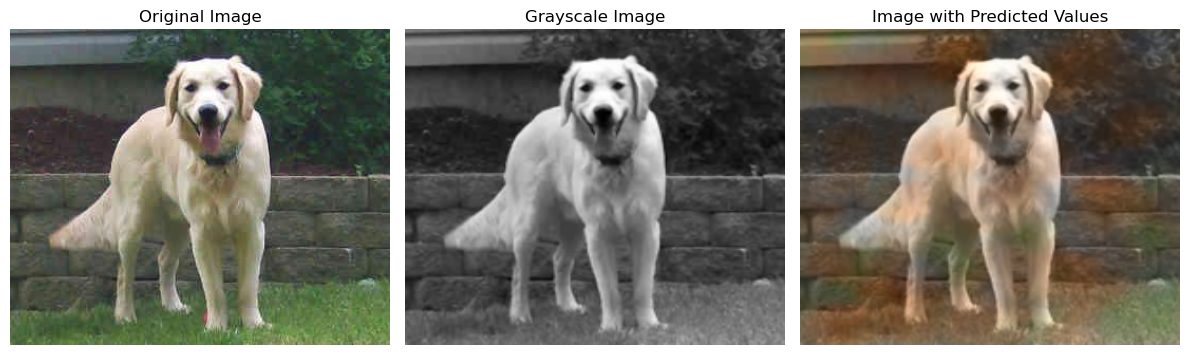

In [13]:
train_loss, val_loss = all_in_one(Batch_Dogs_Model, train_dataloader, (X_val, Y_val), epochs = 100, steps_per_epoch = 15, patience = 50, directory = validation_directory, n = 3, pictures = True)

1/1 [==============================] - 0s 17ms/step


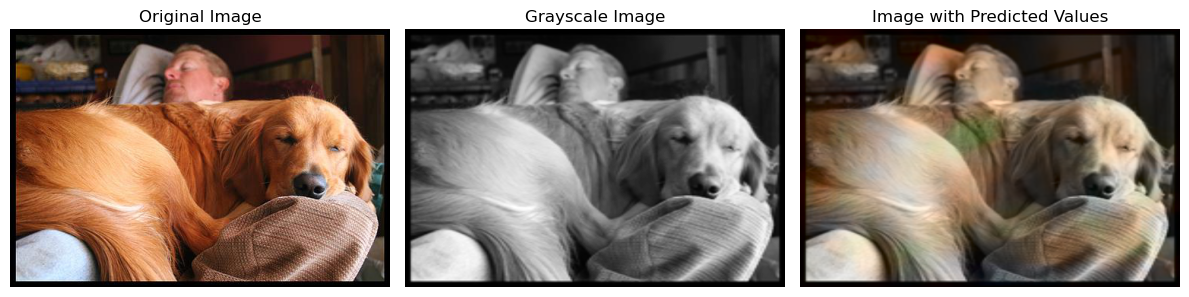

1/1 [==============================] - 0s 16ms/step


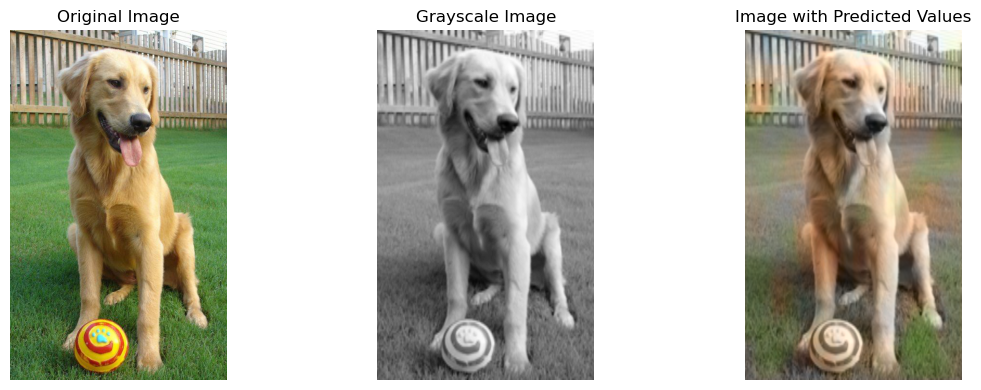

1/1 [==============================] - 0s 16ms/step


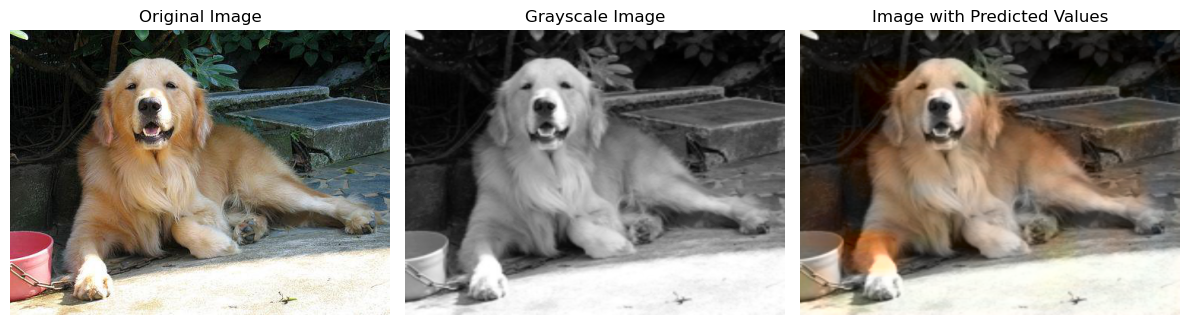

1/1 [==============================] - 0s 42ms/step


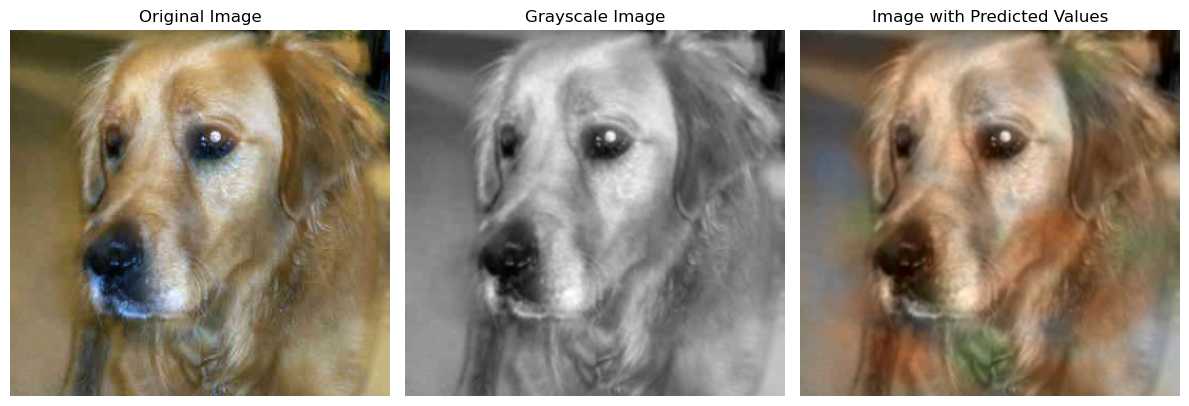

In [24]:
visualize_predictions(Batch_Dogs_Model, validation_directory, 4)

The results are still not incredible, but we are finally getting closer to a good prediction. It is worth noticing that the model seems to be able to recognize when there is a dog in the picture, but the coloring is not precise. Furthermore, the models seems to have noticed that a common color for the surrounding is green, and thus colors the background accordingly.

### Data Augmentation

We now create an ImageDataGenerator object which will iteratively take images from the training dataset, modify them, and then add the modified versions to a new directory

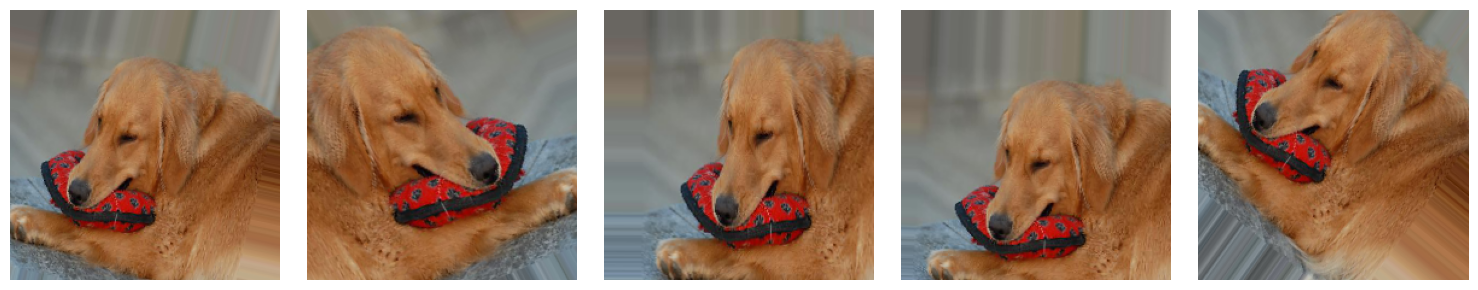

In [3]:
img_path = 'data/GoldenRetriever/training/n02099601_10.jpg'
visualize_augmentation(training_directory + '/n02099601_10.jpg')


In [7]:
augmented_training_directory = '/Users/alessandroardenghi/ImageColorizationProjectData/StanfordDogs/_augmented_training_directory'
augment_directory(training_directory, augmented_training_directory, height, width)

Data augmentation completed.


## Model Training on Augmented Data

In [10]:
batch_size = 8
train_dataloader = data_generator(augmented_training_directory, batch_size, height, width)
val_images = load_images_from_directory(validation_directory, n = 30)
img_shapes, X_val, Y_val = preprocess_images(val_images, height, width)
Batch_Dogs_Model = BatchNormModel(height, width)

In [11]:
train_loss, val_loss = all_in_one(Batch_Dogs_Model, train_dataloader, (X_val, Y_val), epochs = 100, steps_per_epoch = 30, patience = 50, directory = validation_directory, n = 5, pictures = False)

1/1 [==============================] - 0s 18ms/step


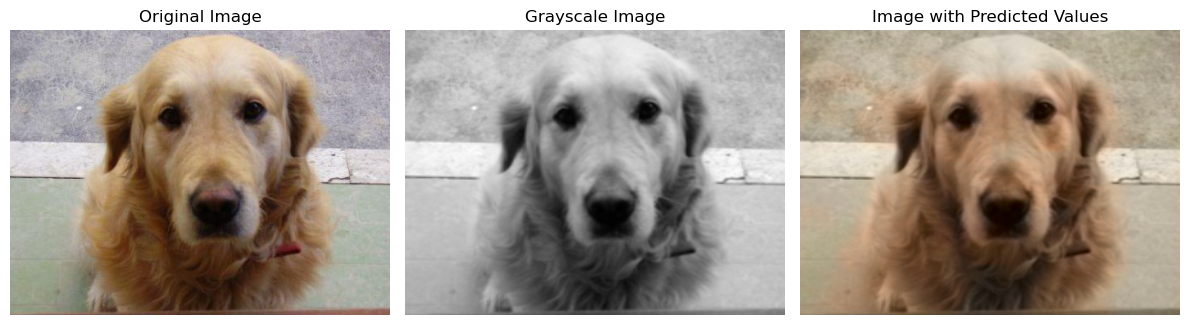

1/1 [==============================] - 0s 19ms/step


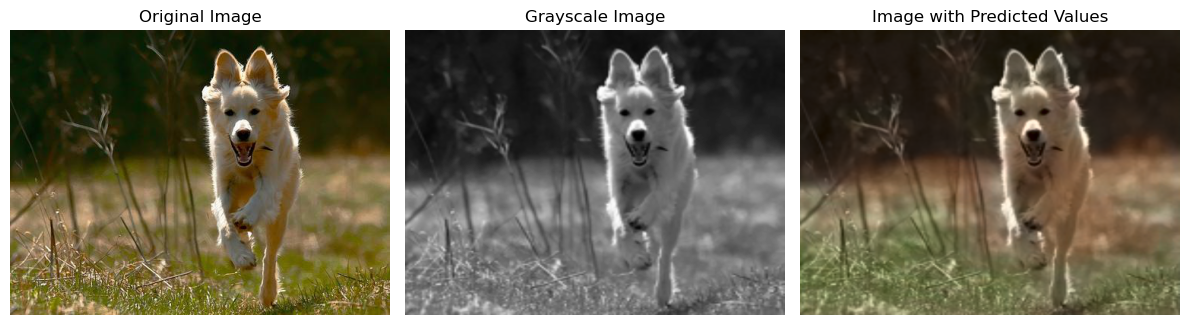

In [38]:
visualize_predictions(Batch_Dogs_Model, validation_directory, 2)

1/1 [==============================] - 0s 18ms/step


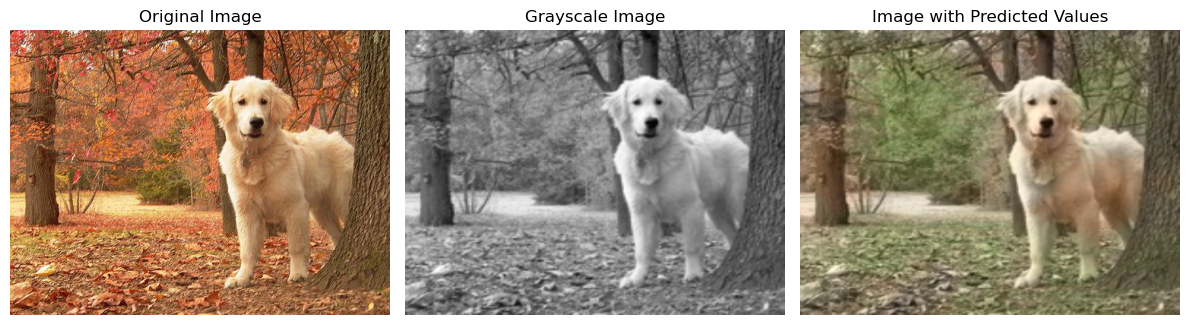

In [42]:
plot_predicted_image(Image.open(validation_directory + '/n02099601_7119.jpg'), Batch_Dogs_Model, height, width)

1/1 [==============================] - 0s 16ms/step


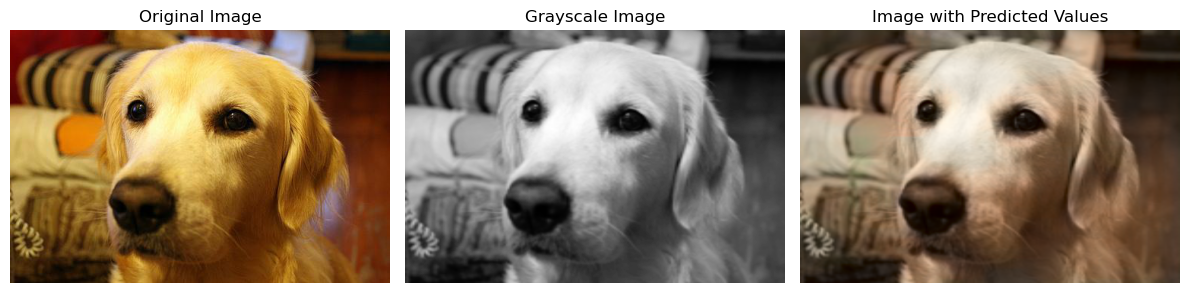

In [43]:
plot_predicted_image(Image.open(validation_directory + '/n02099601_7312.jpg'), Batch_Dogs_Model, height, width)

1/1 [==============================] - 0s 16ms/step


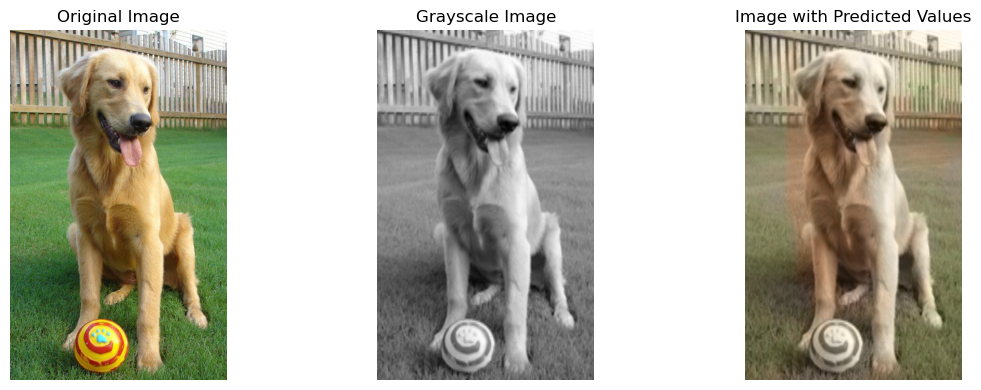

In [44]:
plot_predicted_image(Image.open(validation_directory + '/n02099601_8181.jpg'), Batch_Dogs_Model, height, width)

1/1 [==============================] - 0s 16ms/step


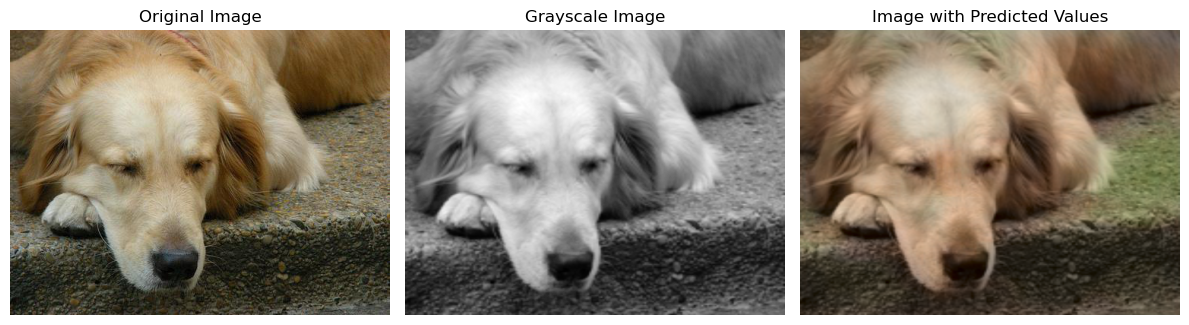

In [45]:
plot_predicted_image(Image.open(validation_directory + '/n02099601_9504.jpg'), Batch_Dogs_Model, height, width)

The predictions now seem to have finally improved!

We can see that the model now makes reasonable predictions from the grayscale images it is given. In particular, we can see that it is now able to recognize when there is a dog in the picture, and it is able to color it in the correct way. Moreover, we can see that the model has also learned to color the grass in green, and it has learned that if there is a dog, it is likely that there is grass around it.

We are also very happy because in this training, the validation error has dropped to only 0.0095, which is lower than it was in the previous trainings on this dataset (around 0.0097), and orders of magnitude smaller than the one we had in the Mirflickr dataset.

---

## Second Section: Conclusion

To sum up our results, the model which generated the best predictions across the different datasets it the one we called **Batch_Norm_Model**, which featured different blocks of convolutional layers, batch norm layers and up sampling layers.

As predicted, exposing the model to a dataset which only features similar images, such as the Stanford Dogs Dataset, dramatically improved the quality of our predictions.

In conclusion, we are happy to report that image colorization seems possible, when there are enough images for each class of data. Building a model to predict the colors of a particular subject (i.e. golden retrievers) is quite easy, even with not so many images, using some techniques of data augmentation and a not so complex neural network.

When using a multi-domain dataset (the MIRFlickr-25000), we never succeded to obtain a MSE smaller than roughly 0.0180. This led the images to be colorized with what seemed to be a blend of all the colors. But the convolutional neural networks we tried were always quite good at recognizing shapes and shades.

When using a dataset that was tailored to different classes (thus containing various samples of similar subjects) we were able to obtain better results, with our model being able to colorize the main subjects and most of the backgrounds with plausible colors.